# Final Project: Regression Analysis

Author: Megan Chastain

Repository: https://github.com/Megan-Chastain1/ml_regression_Chastain

Date: November 23rd, 2025

Introduction: The following is an exploration into the Insurance dataset from UCI. I will perform a regression analysis to see if the cost of healthcare can be predicted from health data, such as BMI, age, and whether or not a person is a smoker.  This journey into health data is important for insurance companies to be able build plans that can assist people with different medical backgrounds and include multiple medical practices.

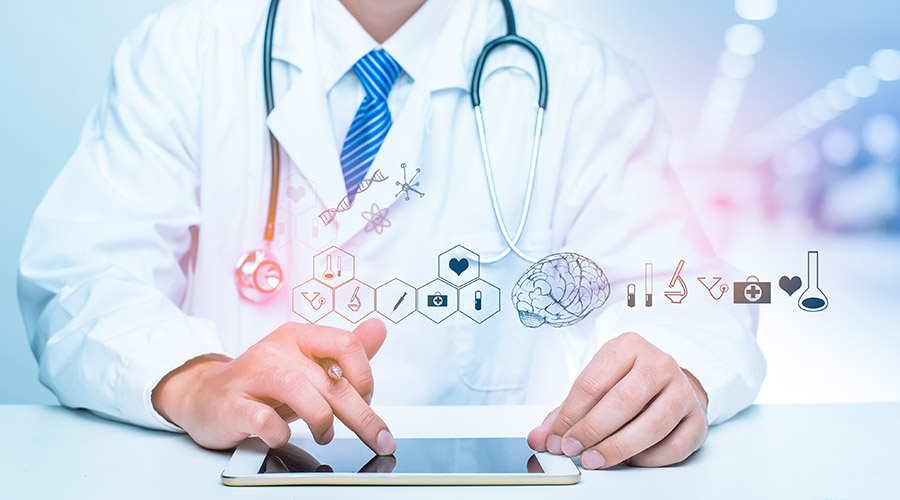

In [224]:
# Imports

import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
reg = LinearRegression()
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


## Section 1. Import and Inspect the Data

### 1.1 Load the dataset and display the first 10 rows.

In [225]:
df = pd.read_csv("data/insurance.csv")

In [226]:
print(df.head(n=10))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


### 1.2 Check for missing values and display summary statistics.

In [227]:
# Missing values in features
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [228]:
# Missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [229]:
# Summary statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Reflection 1: What do you notice about the dataset? Are there any data issues?

There are surprisingly no values missing from the dataset. Also, I am surprised that the max age is 64. 



## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

In [230]:
# Correlations of numeric data
print(df.corr(numeric_only=True))

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


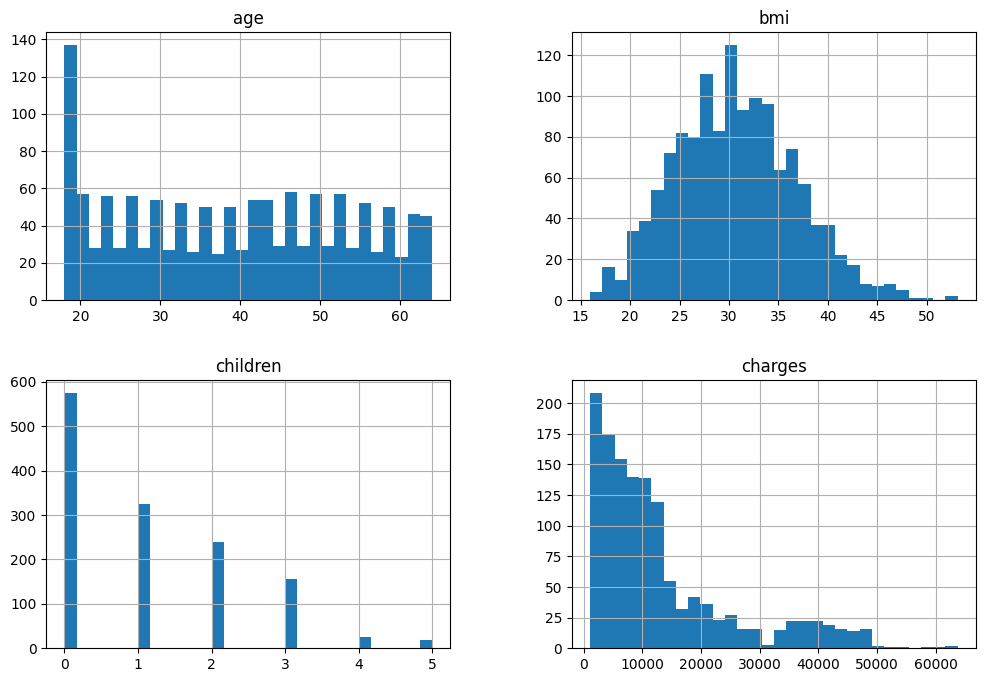

In [231]:
# Histograms
df.hist(bins=30, figsize=(12, 8))
plt.show()

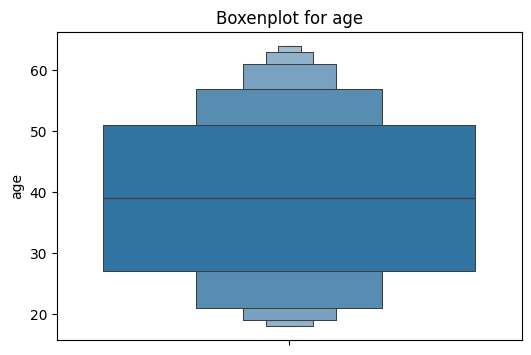

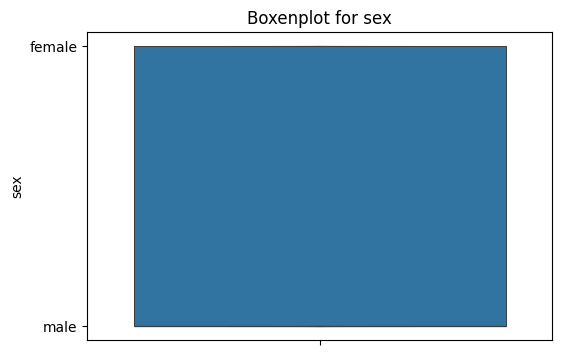

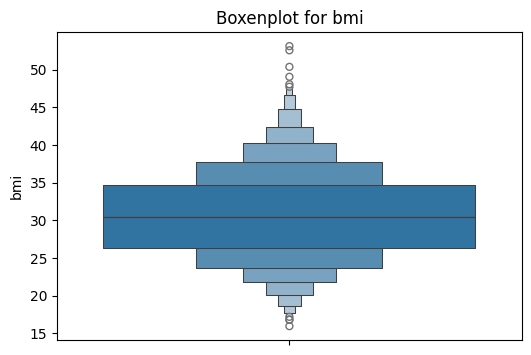

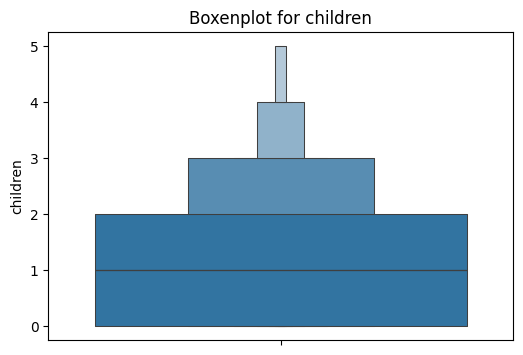

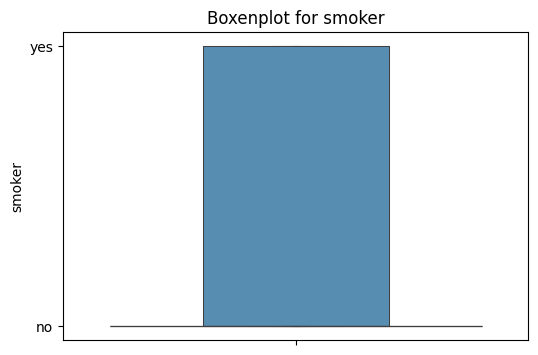

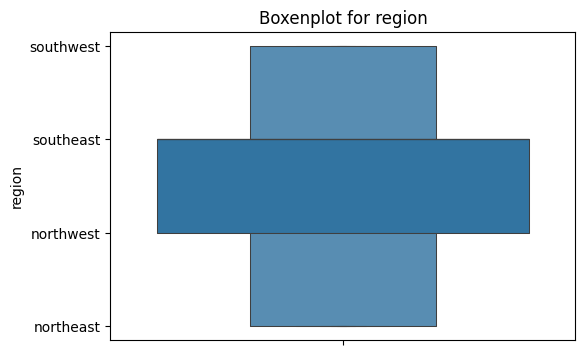

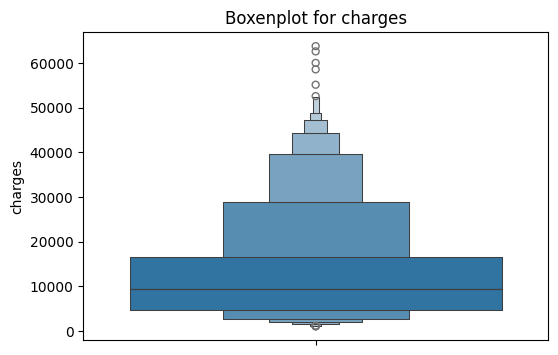

In [232]:
# Boxenplots of the features.
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(y=df[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()

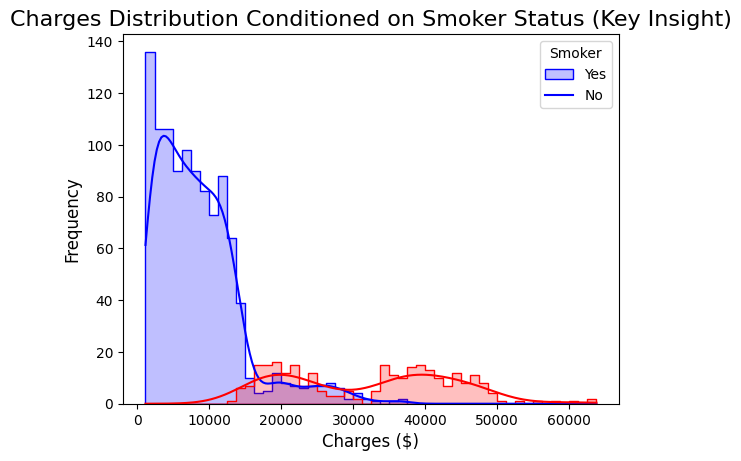

In [233]:
sns.histplot(
    data=df,
    x='charges',
    hue='smoker',
    bins=50,
    kde=True,
    palette={'yes': 'red', 'no': 'blue'},
    element='step' # Use 'step' or 'layer' to overlay the distributions
)
plt.title('Charges Distribution Conditioned on Smoker Status (Key Insight)', fontsize=16)
plt.xlabel('Charges ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Smoker', labels=['Yes', 'No'])
plt.show()

### 2.2 Handle missing values and clean data

There are no missing values.

### 2.3 Feature selection and engineering

Since "Charges" feature is skewed, the log will be taken and used.

In [234]:
# Log of "Charges"

df['log_charges'] = np.log(df['charges'])

In [235]:
# Change 'smoker' to numerical
df['smoker_num'] = df['smoker'].map({
    'yes': 1,
    'no': 0
})

<Figure size 1400x1000 with 0 Axes>

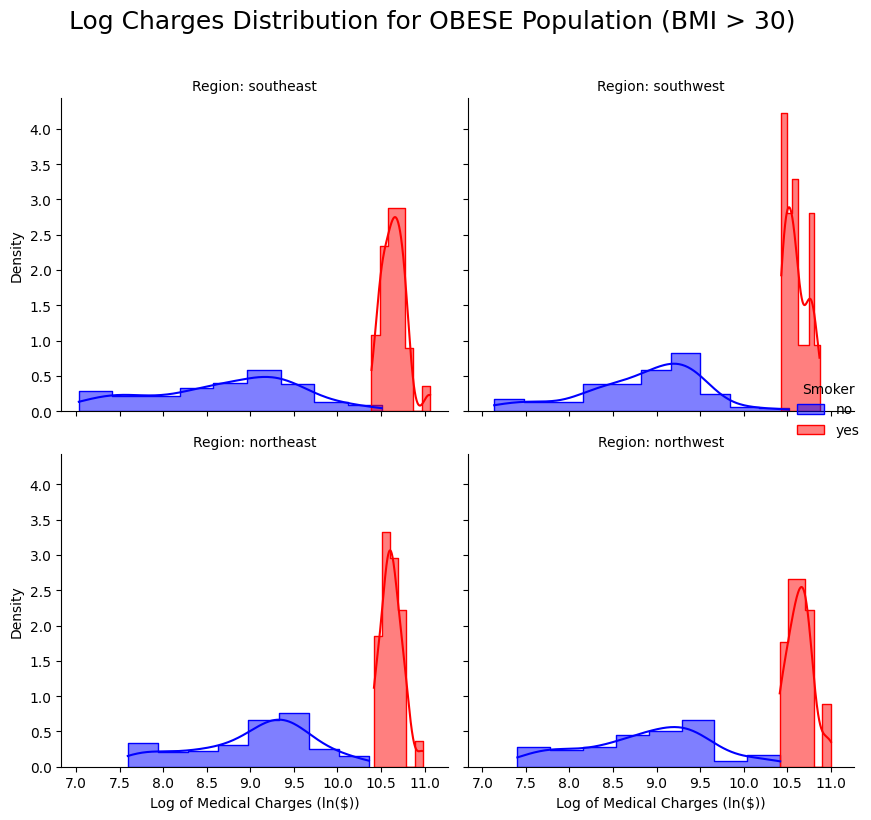

In [236]:
# Distribution of unhealthy characteristics across regions and the related charges

df_obese = df[df['bmi'] > 30].copy()

plt.figure(figsize=(14, 10))

h = sns.FacetGrid(
    df_obese,
    col="region",
    hue="smoker",
    col_wrap=2,
    sharey=True,
    height=4,
    palette={'yes': 'red', 'no': 'blue'}
)

h.map_dataframe(sns.histplot, x="log_charges", kde=True, element='step', stat="density", common_norm=False)
h.add_legend(title="Smoker")
h.set_axis_labels("Log of Medical Charges (ln($))", "Density")
h.set_titles("Region: {col_name}")

plt.suptitle('Log Charges Distribution for OBESE Population (BMI > 30)', y=1.02, fontsize=18)

plt.tight_layout()
plt.show()

### Reflection 2: 

1. What patterns or anomalies do you see? Do any features stand out?  The features that stand out are BMI, Age, and Charges. In Charges and BMI there are outliers. I also think reagion is an interesting feature to explore, however, I will not be moving forward with it.

2. What preprocessing steps were necessary to clean and improve the data? Since charges is highly skewed, I will continue the project by using the log of the values.

3. Did you create or modify any features to improve performance? I did not create any new features, but I did take the log of charges and changed smoker to numerical instead of categorical.

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target

Features are: Age (linear), BMI (linear), Smoking (categorical) 

Target: Charges

### 3.2 Define X and y

In [237]:
X = df[["age","bmi","smoker_num"]]
y = df["log_charges"]

### Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?

I choose the variables that I did because they had the highest positive correlation to charges, so these would be the best place to start.

## Section 4. Train a Model (Linear Regression)

### 4.1 Split the data into training and test sets using train_test_split

In [238]:
# Basic Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test))
print("y_train size:", len(y_train))
print("y_test size:", len(y_test))

X_train size: 1070
X_test size: 268
y_train size: 1070
y_test size: 268


In [239]:
# To do a stratified split (necessary for dealing with skewed data) it has to be binned.
y_binned = pd.cut(
    y,
    bins=10, # You can adjust the number of bins (e.g., 5, 10)
    labels=False, # Return integer codes for the bins (e.g., 0, 1, 2, 3, 4)
    include_lowest=True
)
print(f"\nStratifying on {y_binned.nunique()} bins derived from log(Charges).")
print(f"Bin counts (must all be >= 2):\n{y_binned.value_counts().sort_index()}")


Stratifying on 10 bins derived from log(Charges).
Bin counts (must all be >= 2):
log_charges
0     46
1    105
2    101
3    155
4    198
5    283
6    156
7    123
8    115
9     56
Name: count, dtype: int64


In [240]:
# Perform stratified split
for train_indices, test_indices in splitter.split(X, y_binned):
   X_train = X.iloc[train_indices]
   X_test = X.iloc[test_indices]
   y_train = y.iloc[train_indices] # Use the original continuous y for training
   y_test = y.iloc[test_indices]   # Use the original continuous y for testing

print(f"X_train size: {len(X_train)}")
print(f"X_test size: {len(X_test)}")

X_train size: 1070
X_test size: 268


### 4.2 Train model using Scikit-Learn model.fit() method

In [241]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### 4.3 Evalulate performance

In [242]:
# Regression evaluation: 
y_pred = model.predict(X_test)

r2=r2_score(y_test,y_pred)
print(f'R2:{r2:.2f}')

mae=mean_absolute_error(y_test,y_pred)
print(f'MAE:{mae:.2f}')

rmse = root_mean_squared_error(y_test, y_pred)
print(f'RMSE:{rmse:.2f}')




R2:0.67
MAE:0.33
RMSE:0.52


### Reflection 4: How well did the model perform? Any surprises in the results?

Based on the results, the model is a good fit of the dataset (R2 means the model fits 67% of the data). MAE=0.33 means that the actual values differ only 0.33 from the predicted values (in the log data). RMSE > MAE means that the data is skewed, so the next step is to evaluate outliers.  I kept the linear regression as my model choice because of the continuous data. Other models would require the target feature, charges, to be transformed into a binary type based on whether or not the data fell above or below the mean.

## Section 5. Improve the Model or Try Alternates (Implement Pipelines)

In [243]:
y_reshaped = y.values.reshape(-1, 1)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y_reshaped)
y_scaled_series = pd.Series(y_scaled.flatten(), name='charges_scaled')
print("Original vs. Scaled Charges:")
comparison_df = pd.concat([y.rename('charges_original'), y_scaled_series], axis=1)
print(comparison_df)
print("\nStatistics of the 'charges' column after scaling:")
print(comparison_df['charges_scaled'].describe().loc[['mean', 'std']])


Original vs. Scaled Charges:
      charges_original  charges_scaled
0             9.734176        0.691394
1             7.453302       -1.790020
2             8.400538       -0.759500
3             9.998092        0.978513
4             8.260197       -0.912181
...                ...             ...
1333          9.268661        0.184949
1334          7.698927       -1.522799
1335          7.396233       -1.852106
1336          7.604867       -1.625129
1337         10.279914        1.285113

[1338 rows x 2 columns]

Statistics of the 'charges' column after scaling:
mean    1.781667e-15
std     1.000374e+00
Name: charges_scaled, dtype: float64


In [244]:
# Basic Train/Test split on scaled data
X_train, X_test, y_scaled_train, y_scaled_test = train_test_split(X, y_scaled, test_size=0.2, random_state=123)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test))
print("y_scaled_train size:", len(y_scaled_train))
print("y_scaled_test size:", len(y_scaled_test))

X_train size: 1070
X_test size: 268
y_scaled_train size: 1070
y_scaled_test size: 268


In [245]:
# Fit scaled data
model = LinearRegression()
model.fit(X_train, y_scaled_train)
y_scaled_pred = model.predict(X_test)

In [246]:
# Regression evaluation on scaled data: 
y_scaled_pred = model.predict(X_test)

r2=r2_score(y_scaled_test,y_scaled_pred)
print(f'R2:{r2:.2f}')

mae=mean_absolute_error(y_scaled_test,y_scaled_pred)
print(f'MAE:{mae:.2f}')

rmse = root_mean_squared_error(y_scaled_test, y_scaled_pred)
print(f'RMSE:{rmse:.2f}')

R2:0.79
MAE:0.29
RMSE:0.44


In [249]:
# Elastic Net model on scaled data
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X_train, y_scaled_train)
y_pred_elastic = elastic_model.predict(X_test)

In [250]:
# Elastic Net Regression evaluation: 

r2=r2_score(y_scaled_test,y_pred_elastic)
print(f'R2:{r2:.2f}')

mae=mean_absolute_error(y_scaled_test,y_pred_elastic)
print(f'MAE:{mae:.2f}')

rmse = root_mean_squared_error(y_scaled_test, y_pred_elastic)
print(f'RMSE:{rmse:.2f}')

R2:0.43
MAE:0.57
RMSE:0.73


In [256]:
# Summary table comparing all models:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {root_mean_squared_error(y_true, y_pred):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y_test, y_pred)
report("Scaled", y_scaled_test, y_scaled_pred)
report("ElasticNet", y_scaled_test, y_pred_elastic)


Linear R²: 0.673
Linear RMSE: 0.52
Linear MAE: 0.33

Scaled R²: 0.792
Scaled RMSE: 0.44
Scaled MAE: 0.29

ElasticNet R²: 0.426
ElasticNet RMSE: 0.73
ElasticNet MAE: 0.57



### Reflection 5: Which models performed better? How does scaling impact results?

The linear regression on scaled target feature worked the best. It increased R2, meaning it fit almost 80% of the data with decreasing the MAE, so the predicted values only differed 0.29 from the actual values. The dataset still has outliers, but not as bad as originally.

## Section 6. Final Thoughts & Insights

From what I've seen the best method is a scaled linear regression because the data is continuous and the target feature is a float data type. Scaled R2 fits almost 80% of the dataset, which is pretty good.

If I were to do more I would change the target feature to a binary data type to perform classifier tests like random forest or MLP. 